# Time series forecasting without imputation for Methane emission data

# Importing libraries

In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("CONSOLIDATED DATASET MONTHLY.xlsx",sheet_name='2019-2021final')
# Check the first 5 elements of the dataframe
data.head()

,Month,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,2019-01-01,BD4001,Bagerhat,1,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06
1,2019-01-01,BD2003,Bandarban,2,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06
2,2019-01-01,BD1004,Barguna,3,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06
3,2019-01-01,BD1006,Barisal,4,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06
4,2019-01-01,BD1009,Bhola,5,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       2304 non-null   datetime64[ns]
 1   ADM2_PCODE  2304 non-null   object        
 2   ADM2_EN     2304 non-null   object        
 3   ZONE_CODE   2304 non-null   int64         
 4   COUNT       1152 non-null   float64       
 5   AREA        1152 non-null   float64       
 6   MIN         1152 non-null   float64       
 7   MAX         1152 non-null   float64       
 8   RANGE       1152 non-null   float64       
 9   MEAN        1152 non-null   float64       
 10  STD         1152 non-null   float64       
 11  SUM         1152 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 216.1+ KB


In [4]:
# Check if the the data is set up in proper format and then start modeling/forecasting. 
data.dtypes

Month         datetime64[ns]
ADM2_PCODE            object
ADM2_EN               object
ZONE_CODE              int64
COUNT                float64
AREA                 float64
MIN                  float64
MAX                  float64
RANGE                float64
MEAN                 float64
STD                  float64
SUM                  float64
dtype: object

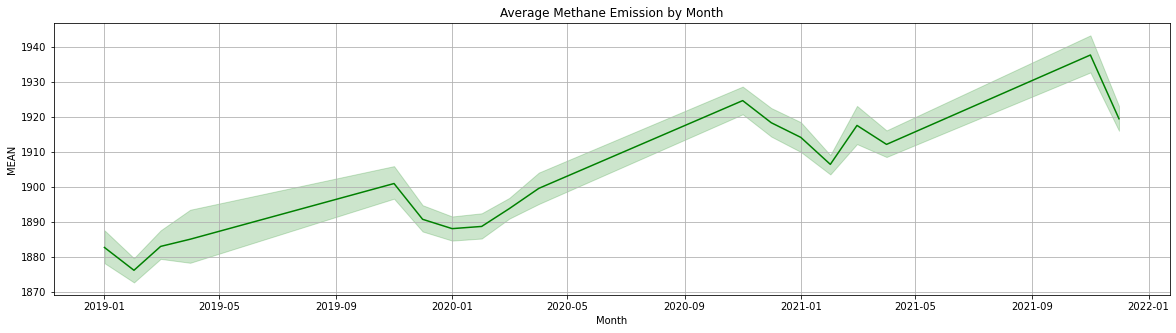

In [5]:
#Visualize the dataframe i.e.Methane emissions 
plt.figure(figsize=(20,5))
sns.lineplot(data=data, x="Month", y="MEAN", color='green')
plt.title("Average Methane Emission by Month")
plt.grid(True)
plt.show()

In [6]:
datanew=data.copy()

In [7]:
datanew

,Month,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,2019-01-01,BD4001,Bagerhat,1,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06
1,2019-01-01,BD2003,Bandarban,2,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06
2,2019-01-01,BD1004,Barguna,3,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06
3,2019-01-01,BD1006,Barisal,4,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06
4,2019-01-01,BD1009,Bhola,5,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2021-12-01,BD5088,Sirajganj,60,2755.0,0.222320,1897.807251,1966.358887,68.551636,1918.658255,8.184749,5.285903e+06
2300,2021-12-01,BD6090,Sunamganj,61,4060.0,0.327630,1869.786743,1937.471191,67.684448,1904.396624,11.857977,7.731850e+06
2301,2021-12-01,BD6091,Sylhet,62,3754.0,0.302937,1892.158203,1921.948486,29.790283,1905.529753,5.117224,7.153359e+06
2302,2021-12-01,BD3093,Tangail,63,3719.0,0.300112,1892.969971,1992.920044,99.950073,1916.621156,9.782420,7.127914e+06


# EDA

In [159]:
datanew.head()

,ds,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,y,STD,SUM
0,2019-01-01,BD4001,Bagerhat,1.0,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06
1,2019-01-01,BD2003,Bandarban,2.0,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06
2,2019-01-01,BD1004,Barguna,3.0,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06
3,2019-01-01,BD1006,Barisal,4.0,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06
4,2019-01-01,BD1009,Bhola,5.0,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06


In [160]:
datanew['month'] = pd.DatetimeIndex(datanew['ds']).month

In [161]:
datanew['year'] = pd.DatetimeIndex(datanew['ds']).year

In [163]:
datanew.head()

,ds,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,y,STD,SUM,month,year
0,2019-01-01,BD4001,Bagerhat,1.0,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06,1,2019
1,2019-01-01,BD2003,Bandarban,2.0,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06,1,2019
2,2019-01-01,BD1004,Barguna,3.0,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06,1,2019
3,2019-01-01,BD1006,Barisal,4.0,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06,1,2019
4,2019-01-01,BD1009,Bhola,5.0,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06,1,2019


In [166]:
datanew_2019=datanew[datanew["year"] == 2019]

In [170]:
datanew_2019.tail()

,ds,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,y,STD,SUM,month,year
763,2019-12-01,BD5088,Sirajganj,60.0,2755.0,0.222320,1834.689941,1902.642944,67.953003,1883.466700,11.008014,5.188951e+06,12,2019
764,2019-12-01,BD6090,Sunamganj,61.0,4060.0,0.327630,1848.599365,1903.060059,54.460693,1874.750729,18.082193,7.611488e+06,12,2019
765,2019-12-01,BD6091,Sylhet,62.0,3754.0,0.302937,1840.683838,1910.822021,70.138184,1878.444624,12.769685,7.051681e+06,12,2019
766,2019-12-01,BD3093,Tangail,63.0,3719.0,0.300112,1813.760010,1973.971680,160.211670,1882.748916,17.845848,7.001943e+06,12,2019
767,2019-12-01,BD5594,Thakurgaon,64.0,1992.0,0.160748,1886.637695,1907.243530,20.605835,1894.658026,3.830461,3.774159e+06,12,2019


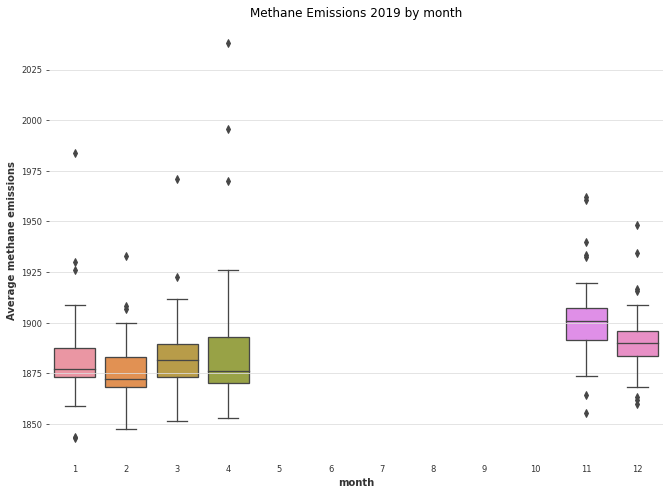

In [179]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=datanew_2019, x='month', y='y', ax=ax)

ax.set_title('Methane Emissions 2019 by month')

ax.set_ylabel('Average methane emissions');

In [171]:
datanew_2020=datanew[datanew["year"] == 2020]

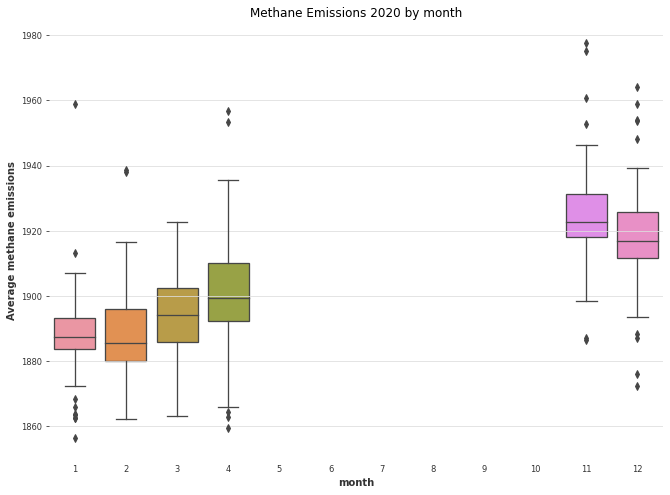

In [178]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=datanew_2020, x='month', y='y', ax=ax)

ax.set_title('Methane Emissions 2020 by month')

ax.set_ylabel('Average methane emissions');

In [174]:
datanew_2021=datanew[datanew["year"] == 2021]

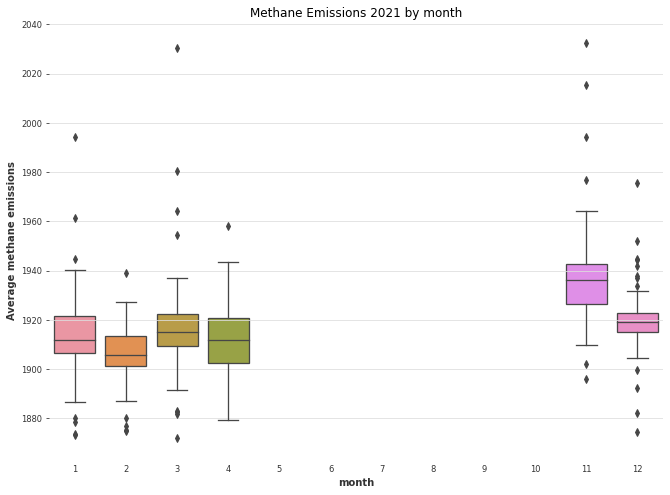

In [177]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.boxplot(data=datanew_2021, x='month', y='y', ax=ax)

ax.set_title('Methane Emissions 2021 by month')

ax.set_ylabel('Average methane emissions');

In [8]:
datanew.rename({'Month': 'DS'}, axis=1, inplace=True)

In [9]:
datanew.rename({'DS': 'ds'}, axis=1, inplace=True)

In [10]:
datanew.rename({'MEAN': 'y'}, axis=1, inplace=True)

In [11]:
datanew.columns

Index(['ds', 'ADM2_PCODE', 'ADM2_EN', 'ZONE_CODE', 'COUNT', 'AREA', 'MIN',
       'MAX', 'RANGE', 'y', 'STD', 'SUM'],
      dtype='object')

In [12]:
datanew.columns = ['ds', 'ADM2_PCODE', 'ADM2_EN', 'ZONE_CODE', 'COUNT', 'AREA', 'MIN',
       'MAX', 'RANGE', 'y', 'STD', 'SUM']
model = Prophet()
model.fit(datanew)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = model.make_future_dataframe(periods= 24, freq='m')


In [14]:
future.tail(12)


,ds
48,2022-12-31
49,2023-01-31
50,2023-02-28
51,2023-03-31
52,2023-04-30
53,2023-05-31
54,2023-06-30
55,2023-07-31
56,2023-08-31
57,2023-09-30


In [15]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
55,2023-07-31,1918.343518,1850.798041,1900.155179,1908.847402,1927.869967,-42.649547,-42.649547,-42.649547,-42.649547,-42.649547,-42.649547,0.0,0.0,0.0,1875.693970
56,2023-08-31,1918.760903,1841.946674,1894.200941,1908.511507,1929.050407,-51.151294,-51.151294,-51.151294,-51.151294,-51.151294,-51.151294,0.0,0.0,0.0,1867.609608
57,2023-09-30,1919.164824,1899.101083,1949.055515,1907.863415,1930.241396,3.918553,3.918553,3.918553,3.918553,3.918553,3.918553,0.0,0.0,0.0,1923.083376
58,2023-10-31,1919.582209,1914.329196,1962.902413,1907.590315,1931.755016,19.117544,19.117544,19.117544,19.117544,19.117544,19.117544,0.0,0.0,0.0,1938.699752
59,2023-11-30,1919.986130,1897.316245,1949.302903,1907.266087,1933.041080,2.901929,2.901929,2.901929,2.901929,2.901929,2.901929,0.0,0.0,0.0,1922.888059


In [16]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(12)

,ds,yhat,yhat_lower,yhat_upper
48,2022-12-31,1917.648702,1895.077804,1942.129195
49,2023-01-31,1922.302588,1897.724823,1945.461547
50,2023-02-28,1924.729485,1899.900108,1948.952667
51,2023-03-31,1924.881149,1901.985070,1948.546450
52,2023-04-30,1945.056940,1924.098403,1969.561804
53,2023-05-31,1943.141651,1919.509310,1967.707107
54,2023-06-30,1905.280795,1879.588630,1929.307208
55,2023-07-31,1875.693970,1850.798041,1900.155179
56,2023-08-31,1867.609608,1841.946674,1894.200941
57,2023-09-30,1923.083376,1899.101083,1949.055515


In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,1874.526889,1858.297491,1904.235097,1874.526889,1874.526889,7.133766,7.133766,7.133766,7.133766,7.133766,7.133766,0.0,0.0,0.0,1881.660655
1,2019-02-01,1874.957814,1854.391477,1898.549047,1874.957814,1874.957814,2.063056,2.063056,2.063056,2.063056,2.063056,2.063056,0.0,0.0,0.0,1877.020869
2,2019-03-01,1875.347068,1861.542533,1904.953870,1875.347068,1875.347068,8.494043,8.494043,8.494043,8.494043,8.494043,8.494043,0.0,0.0,0.0,1883.841111
3,2019-04-01,1875.778120,1859.958355,1905.381089,1875.778120,1875.778120,8.216275,8.216275,8.216275,8.216275,8.216275,8.216275,0.0,0.0,0.0,1883.994394
4,2019-05-01,1876.195315,1874.198583,1919.505480,1876.195315,1876.195315,21.423098,21.423098,21.423098,21.423098,21.423098,21.423098,0.0,0.0,0.0,1897.618413
5,2019-06-01,1876.626417,1882.696033,1926.591621,1876.626417,1876.626417,28.141616,28.141616,28.141616,28.141616,28.141616,28.141616,0.0,0.0,0.0,1904.768032
6,2019-07-01,1877.043612,1848.587607,1894.770717,1877.043612,1877.043612,-6.362795,-6.362795,-6.362795,-6.362795,-6.362795,-6.362795,0.0,0.0,0.0,1870.680817
7,2019-08-01,1877.474714,1814.678481,1861.545693,1877.474714,1877.474714,-39.051094,-39.051094,-39.051094,-39.051094,-39.051094,-39.051094,0.0,0.0,0.0,1838.423620
8,2019-09-01,1877.905815,1800.333433,1847.803835,1877.905815,1877.905815,-54.624518,-54.624518,-54.624518,-54.624518,-54.624518,-54.624518,0.0,0.0,0.0,1823.281298
9,2019-10-01,1878.323011,1847.511905,1894.651494,1878.323011,1878.323011,-7.945395,-7.945395,-7.945395,-7.945395,-7.945395,-7.945395,0.0,0.0,0.0,1870.377616


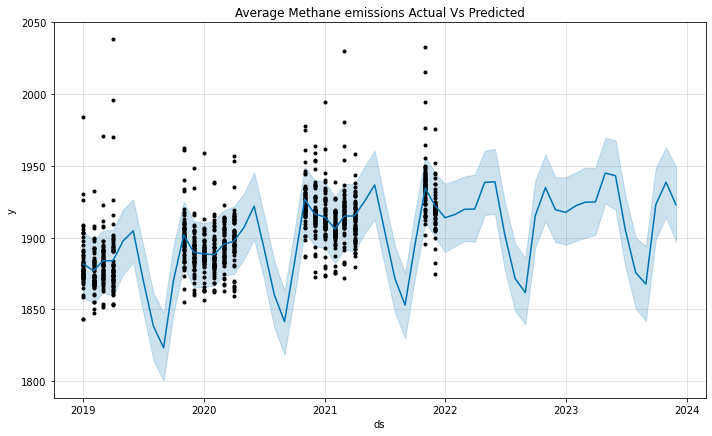

In [18]:
# Plot the graph of this data to get an understanding of how well forecast looks
model.plot(forecast);
plt.title("Average Methane emissions Actual Vs Predicted")
plt.show()


In [20]:
# def get_prediction(df):
#     prediction = {}
# #     df = df.rename(columns={'Date of the document': 'ds','Quantity sold': 'y', 'Article bar code': 'article'})
#     list_articles = df.ADM2_EN.unique()

#     for article in list_articles:
#         article_df = df.loc[df['ADM2_EN'] == article]
#         # set the uncertainty interval to 95% (the Prophet default is 80%)
# #         my_model = Prophet(weekly_seasonality= True, daily_seasonality=True,seasonality_prior_scale=1.0)
#         my_model = Prophet()
#         my_model.fit(article_df)
#         future_dates = my_model.make_future_dataframe(periods=12, freq='m')
#         forecast = my_model.predict(future_dates)
#         prediction[article] = forecast
#     return prediction

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = datanew['y'][:24].values
y_pred = forecast['yhat'][:24].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# r = r2_score(y_true, y_pred)
# print('R-squared Score: %.3f' % r)

MAE: 25.158


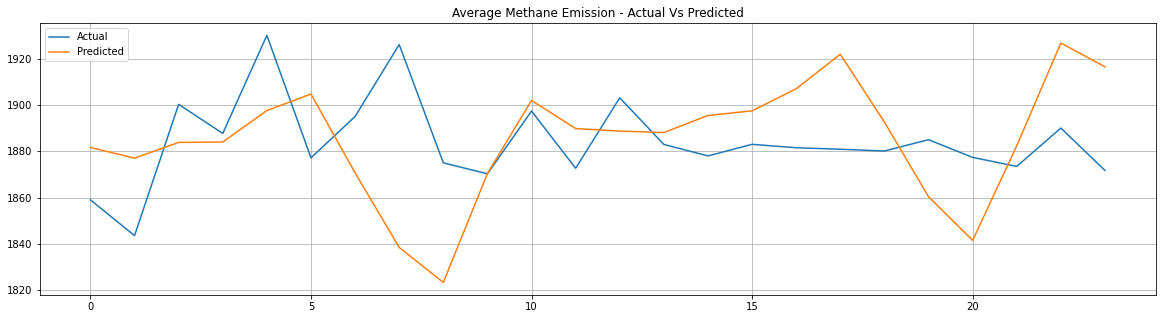

In [21]:
plt.figure(figsize=(20,5))
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Average Methane Emission - Actual Vs Predicted")
plt.grid(True)
plt.legend()
plt.show()

# Naive Forecast model -  Setting up a baseline model

In [34]:
import pandas as pd
# import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from darts import TimeSeries
from darts.models import *
from darts.metrics import *
from darts.dataprocessing.transformers import Scaler
import logging

mpl.rcParams['figure.dpi'] = 300
logging.disable(logging.CRITICAL)

INFO:darts.models:Support for LightGBM not available.To enable LightGBM support in Darts, follow the detailed install instructions for LightGBM in the README: https://github.com/unit8co/darts/blob/master/README.md


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       2304 non-null   datetime64[ns]
 1   ADM2_PCODE  2304 non-null   object        
 2   ADM2_EN     2304 non-null   object        
 3   ZONE_CODE   2304 non-null   int64         
 4   COUNT       1152 non-null   float64       
 5   AREA        1152 non-null   float64       
 6   MIN         1152 non-null   float64       
 7   MAX         1152 non-null   float64       
 8   RANGE       1152 non-null   float64       
 9   MEAN        1152 non-null   float64       
 10  STD         1152 non-null   float64       
 11  SUM         1152 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 216.1+ KB


In [36]:
data.head()

,Month,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,2019-01-01,BD4001,Bagerhat,1,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06
1,2019-01-01,BD2003,Bandarban,2,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06
2,2019-01-01,BD1004,Barguna,3,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06
3,2019-01-01,BD1006,Barisal,4,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06
4,2019-01-01,BD1009,Bhola,5,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06


In [37]:
data1=data.copy()

In [38]:
# df = pd.read_csv('data/monthly_in_situ_co2_mlo.csv',
#                   comment = '"', header = [0,1,2], na_values = '-99.99')

# cols = [' '.join(col).replace(' ', '') for col in df.columns.values]
# df.set_axis(cols, axis = 1, inplace = True)

# Converting Excel date format to datetime
# and setting as dataframe index
data1['Month'] = pd.to_datetime(data1['Month'])

data1.set_index('Month', inplace = True)



In [39]:
data1.head()

,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
Month,,,,,,,,,,,
2019-01-01,BD4001,Bagerhat,1,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06
2019-01-01,BD2003,Bandarban,2,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06
2019-01-01,BD1004,Barguna,3,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06
2019-01-01,BD1006,Barisal,4,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06
2019-01-01,BD1009,Bhola,5,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06


In [40]:
data1 = data1[['MEAN']]
data1.rename(columns = {'MEAN': 'Methane_emission'}, inplace = True)
data1.dropna(inplace = True)
data1 = data1.resample('M').sum()

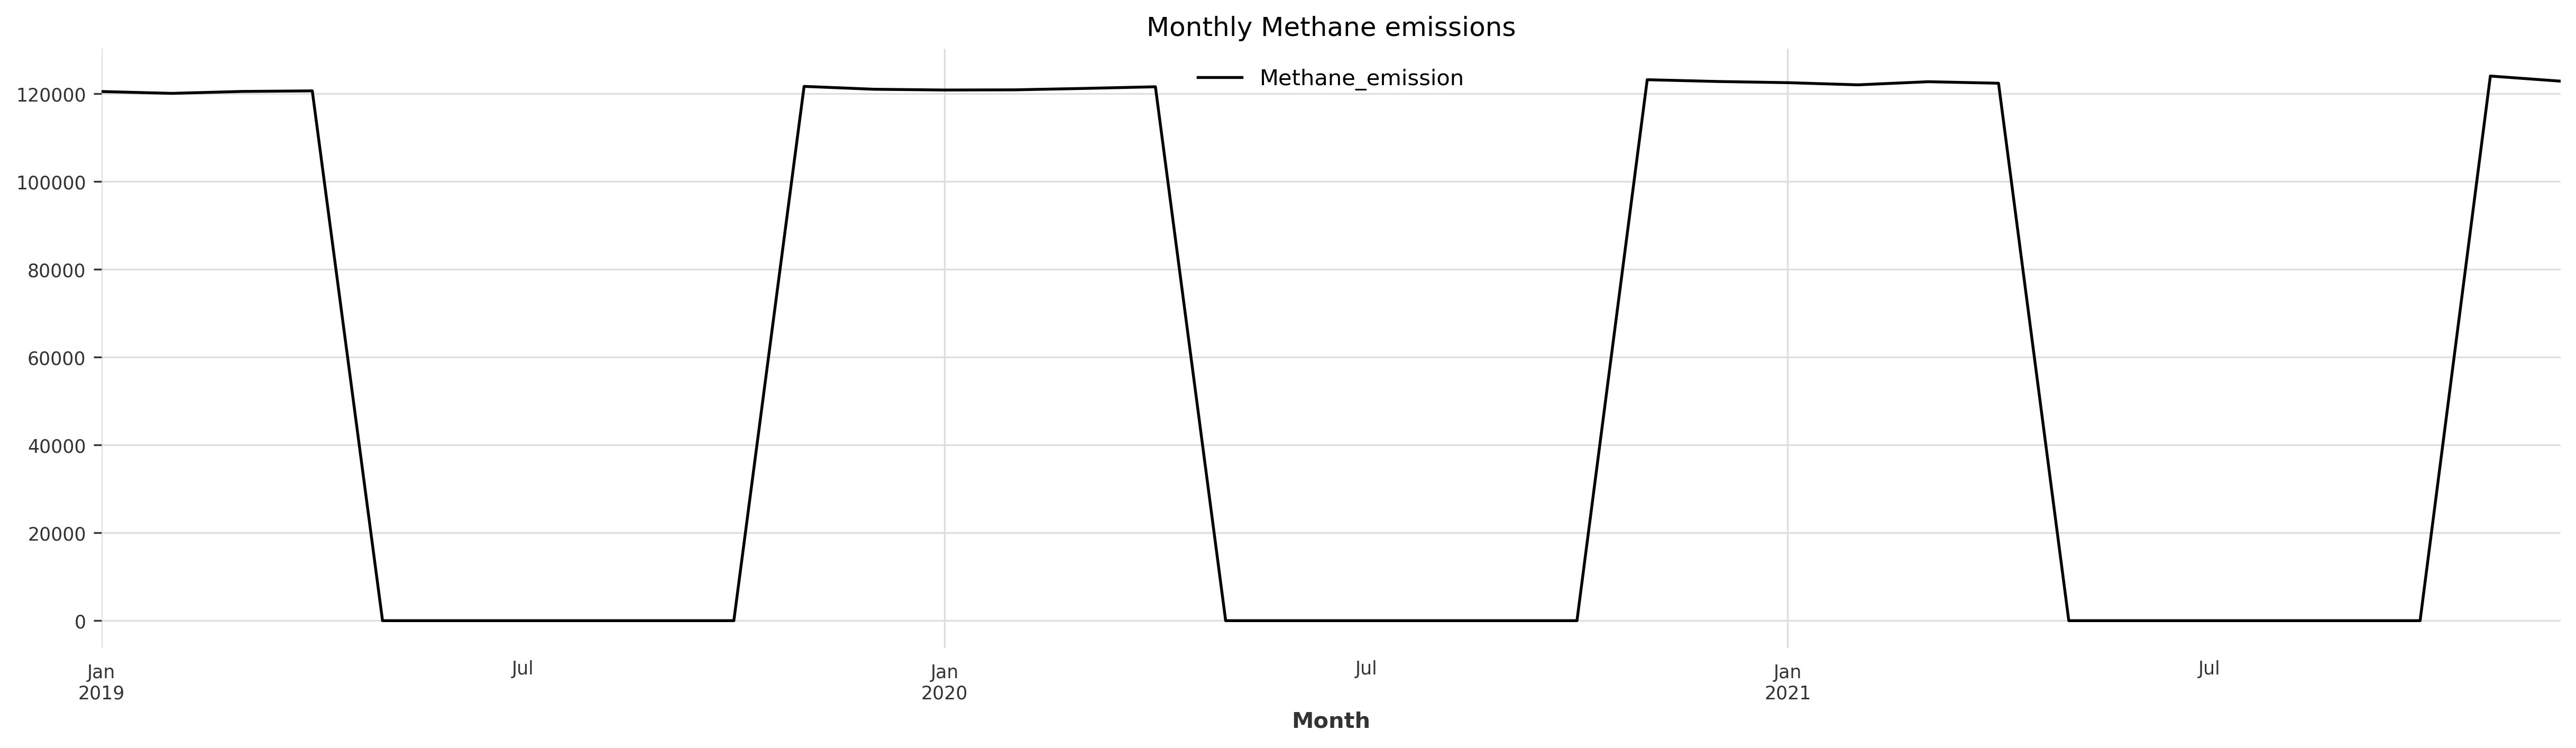

In [42]:
data1.plot(figsize=(20,5))
plt.title('Monthly Methane emissions')

plt.show()

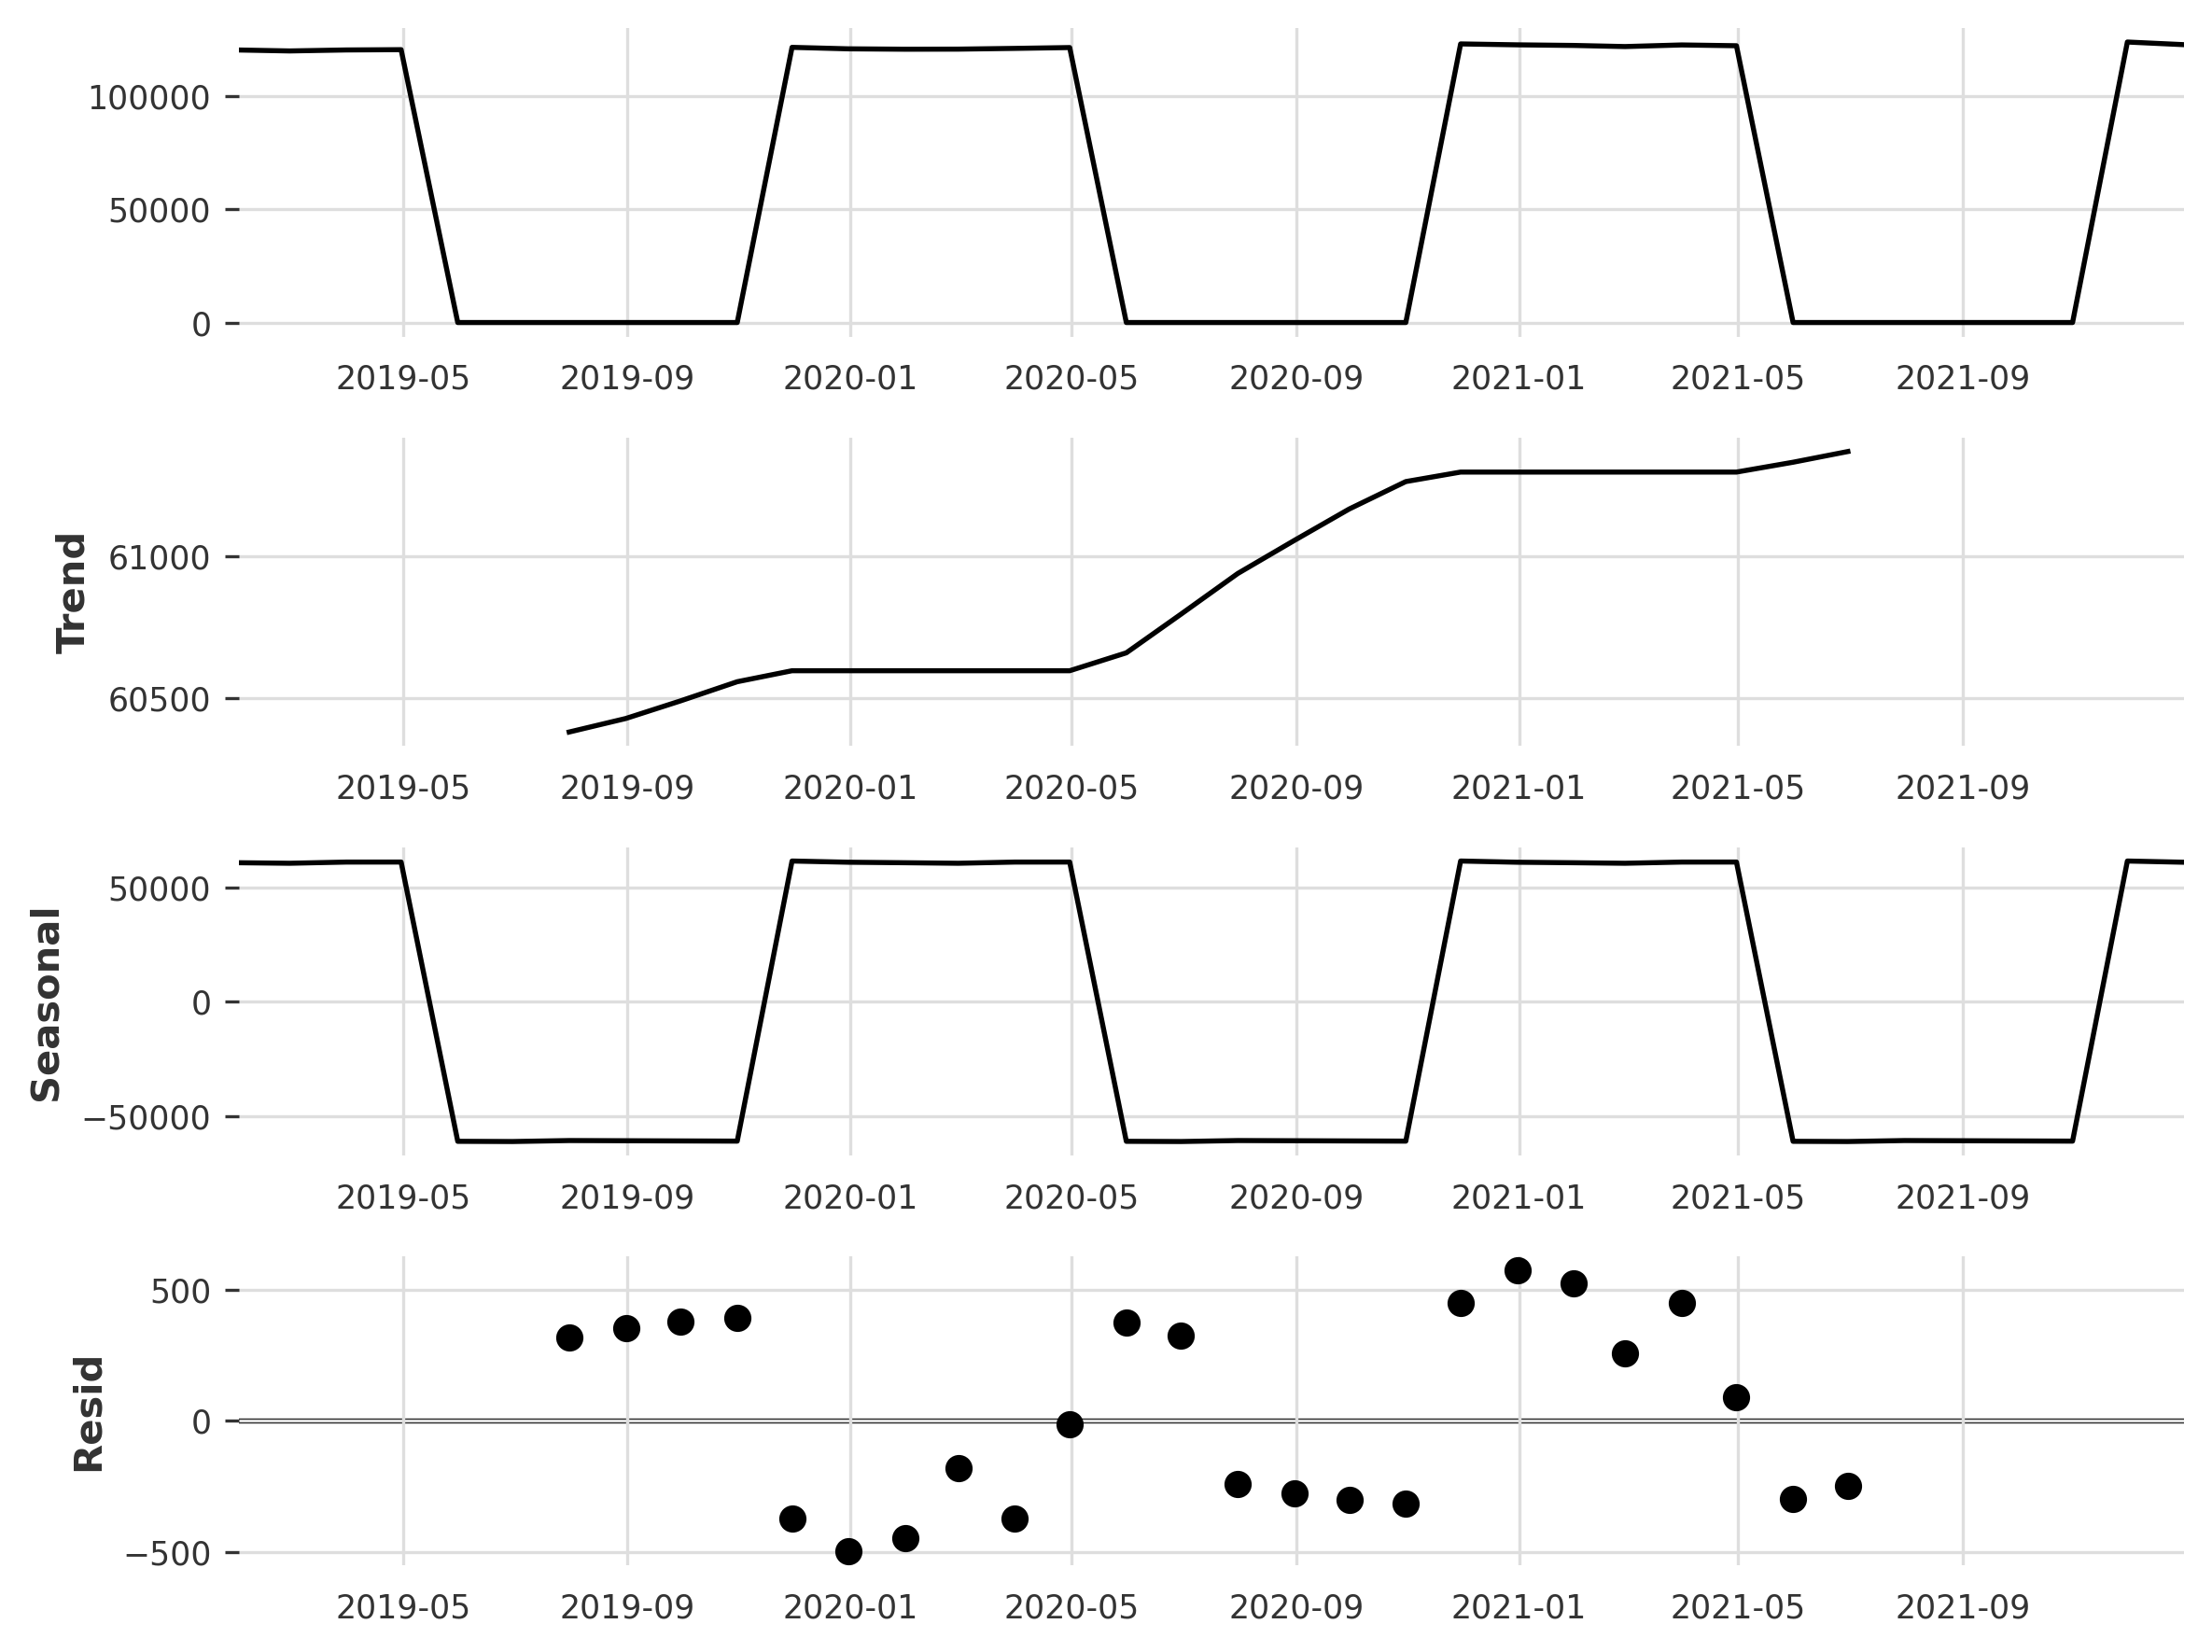

In [44]:
mpl.rcParams['figure.figsize'] = (8, 6)

result = seasonal_decompose(data1,period=12)
result.plot()

plt.show()

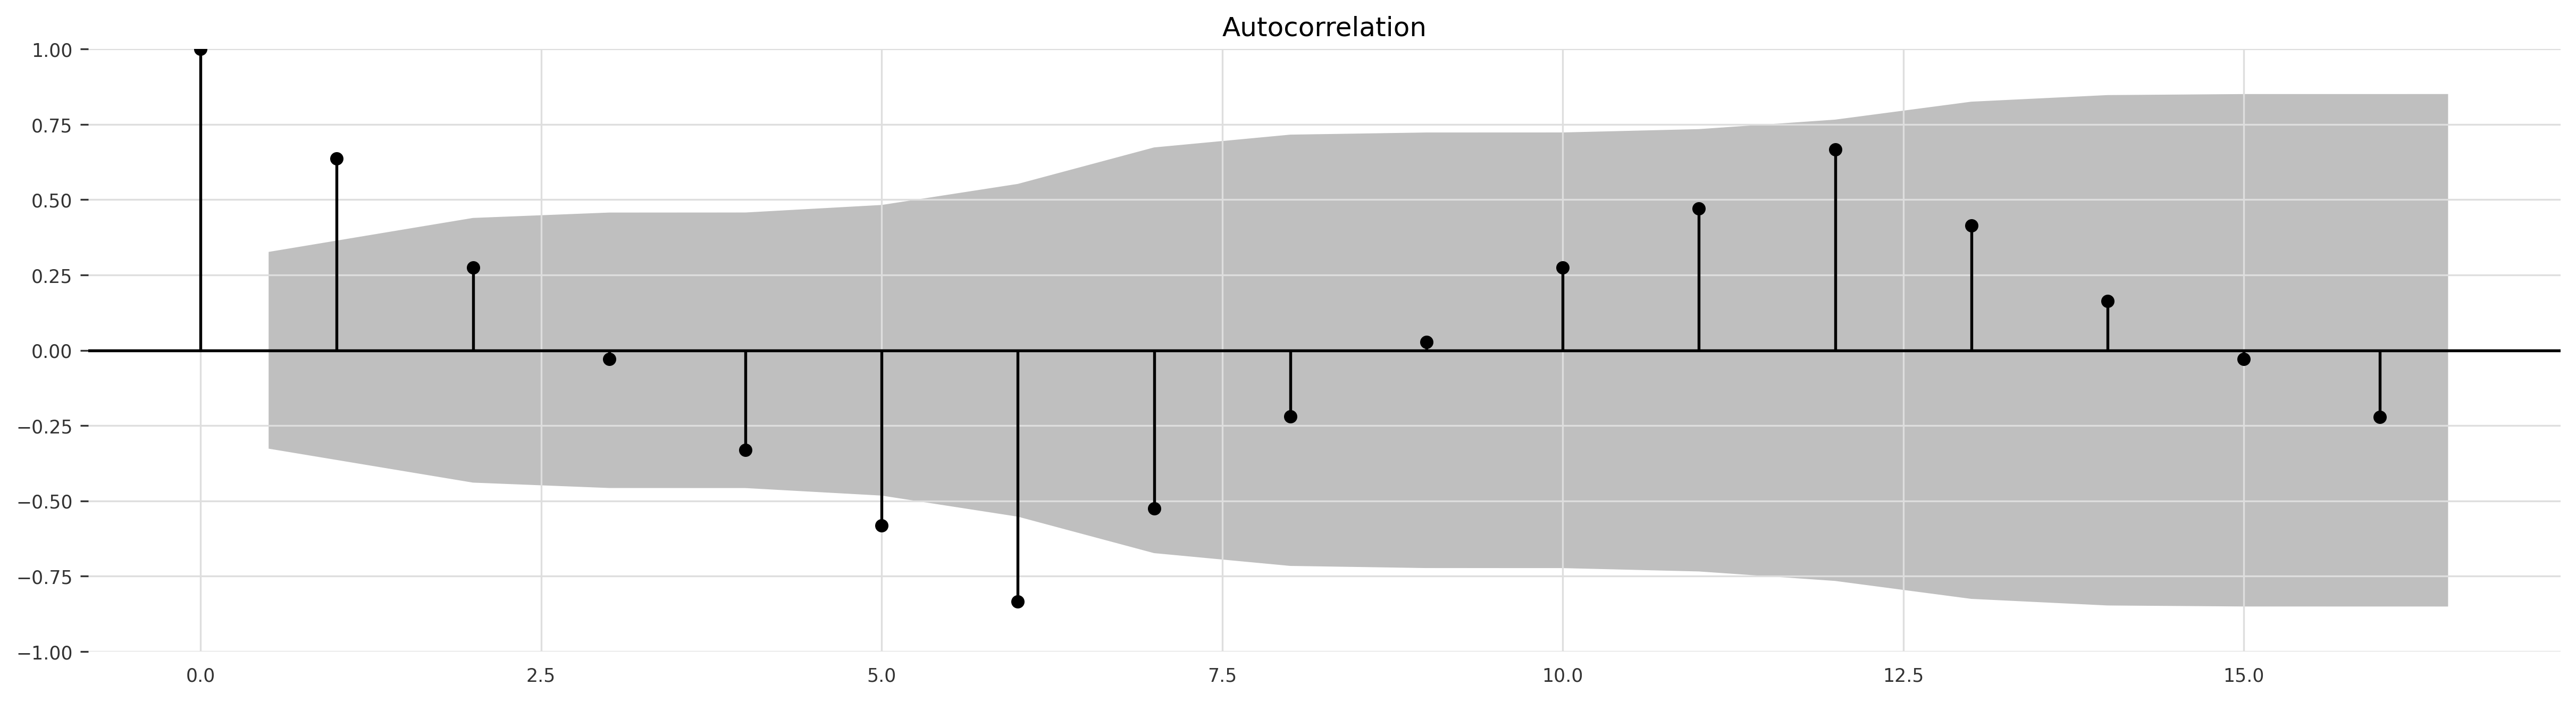

In [45]:
fig, ax = plt.subplots(figsize = (20,5))

plot_acf(data1, ax = ax)

plt.show()

In [53]:
series = TimeSeries.from_dataframe(data1)

start = pd.Timestamp("123120")
df_metrics = pd.DataFrame()

def plot_backtest(series, forecast, model_name):
    idx = -144
    series[idx:].plot(label='Actual Values')
    forecast[idx:].plot(label= 'Forecast')
    plt.title(model_name)
    plt.show()
    
def print_metrics(series, forecast, model_name):
    mae_ = mae(series, forecast)
    rmse_ = rmse(series, forecast)
#     mape_ = mape(series, forecast)
#     smape_ = smape(series, forecast)
#     r2_score_ = r2_score(series, forecast)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_,
#              'MAPE': mape_, 'SMAPE': smape_, 
#              'R2': r2_score_
            }
    
    df = pd.DataFrame(dict_, index = [model_name])
    
    return(df.round(decimals = 2))       

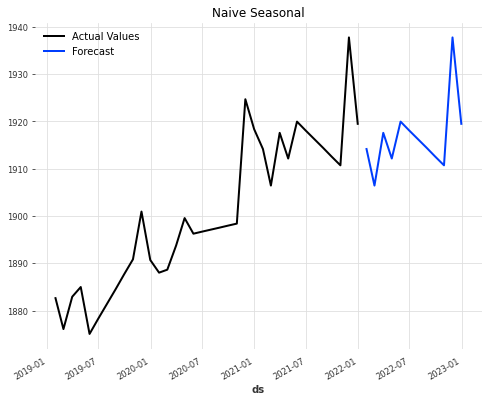

component             y
ds                     
2022-01-31  1914.161558
2022-02-28  1906.436438
2022-03-31  1917.581581
2022-04-30  1912.152603
2022-05-31  1919.955284
2022-06-30  1918.107221
2022-07-31  1916.259159
2022-08-31  1914.411097
2022-09-30  1912.563034
2022-10-31  1910.714972
2022-11-30  1937.747774
2022-12-31  1919.486550


In [158]:
model = NaiveSeasonal(K = 12)
model_name = 'Naive Seasonal'
model.fit(series)
forecast = model.predict(12)

plot_backtest(series, forecast, model_name)
print(forecast.pd_dataframe())

# Sarimax model 

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error
%matplotlib inline

In [23]:
datanewsarimax=datanew.copy()

In [24]:
datanew.columns

Index(['ds', 'ADM2_PCODE', 'ADM2_EN', 'ZONE_CODE', 'COUNT', 'AREA', 'MIN',
       'MAX', 'RANGE', 'y', 'STD', 'SUM'],
      dtype='object')

In [25]:
datanewsarimax.dropna(inplace = True)

In [26]:
datanewsarimax

,ds,ADM2_PCODE,ADM2_EN,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,y,STD,SUM
0,2019-01-01,BD4001,Bagerhat,1,3816.0,0.307940,1807.507202,1908.687622,101.180420,1858.995721,23.941344,7.093928e+06
1,2019-01-01,BD2003,Bandarban,2,4898.0,0.395254,1806.120483,1882.715576,76.595093,1843.522820,16.032945,9.029575e+06
2,2019-01-01,BD1004,Barguna,3,1420.0,0.114590,1814.506226,1936.939941,122.433716,1900.288210,33.386658,2.698409e+06
3,2019-01-01,BD1006,Barisal,4,2331.0,0.188105,1868.450806,1940.849976,72.399170,1887.722332,11.607219,4.400281e+06
4,2019-01-01,BD1009,Bhola,5,1905.0,0.153728,1878.400635,1950.949951,72.549316,1930.130305,27.223902,3.676898e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2021-12-01,BD5088,Sirajganj,60,2755.0,0.222320,1897.807251,1966.358887,68.551636,1918.658255,8.184749,5.285903e+06
2300,2021-12-01,BD6090,Sunamganj,61,4060.0,0.327630,1869.786743,1937.471191,67.684448,1904.396624,11.857977,7.731850e+06
2301,2021-12-01,BD6091,Sylhet,62,3754.0,0.302937,1892.158203,1921.948486,29.790283,1905.529753,5.117224,7.153359e+06
2302,2021-12-01,BD3093,Tangail,63,3719.0,0.300112,1892.969971,1992.920044,99.950073,1916.621156,9.782420,7.127914e+06


In [27]:
# Augmented Dickey-Fuller test
ad_fuller_result = adfuller(datanewsarimax['y'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: -2.1438875997792044
p-value: 0.22723708687506633


In [28]:
best_model = SARIMAX(datanewsarimax['y'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 52)).fit(dis=-1)
print(best_model.summary())

C:\Users\rramr\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rramr\Anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rramr\Anaconda4\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 1152
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 52)   Log Likelihood               -4853.967
Date:                            Fri, 15 Jul 2022   AIC                           9721.935
Time:                                    08:00:46   BIC                           9756.950
Sample:                                         0   HQIC                          9735.182
                                           - 1152                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0457      0.024      1.874      0.061      -0.002       0.093
ar.L2          0.0185      0.037   

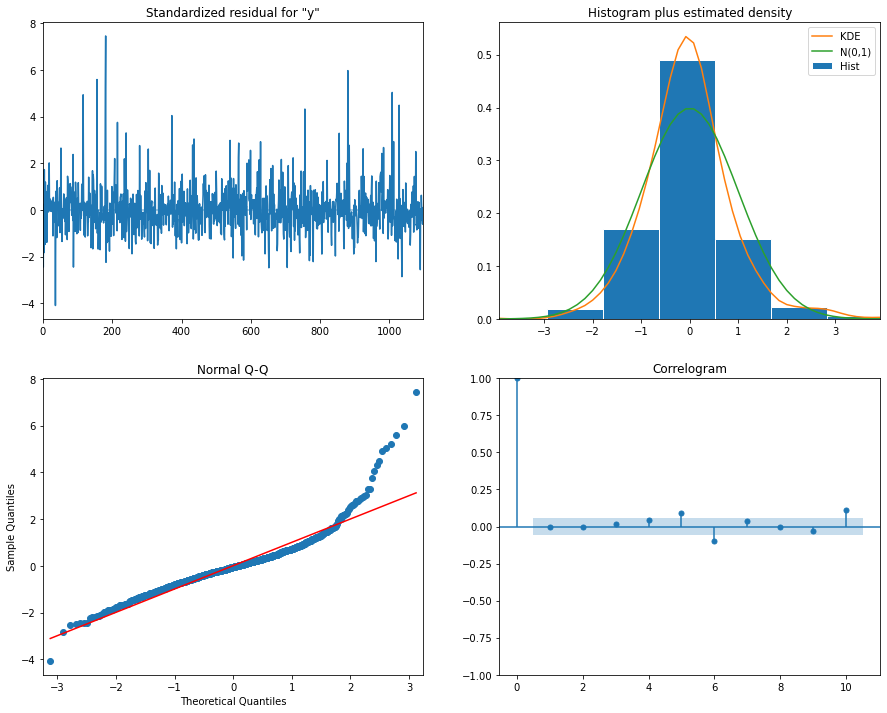

In [29]:
#Diagnosing the model residuals
best_model.plot_diagnostics(figsize=(15,12));

# Other models to explore

# Exponential Smoothing

In [ ]:
model = ExponentialSmoothing(seasonal_periods = 12)
model_name = 'Exponential Smoothing'

plt.figure(figsize = (8, 5))

forecast = model.historical_forecasts(series, start=start, forecast_horizon=12, verbose=True)
plot_backtest(series, forecast, model_name)
df_exp = print_metrics(series, forecast, model_name)
df_metrics = df_metrics.append(df_exp)

plt.show()
df_exp

# Linear Regression

In [ ]:
model = LinearRegressionModel(lags = 12)
model_name = 'Linear Regression'

plt.figure(figsize = (8, 5))

forecast = model.historical_forecasts(series, start=start, forecast_horizon=12, verbose=True)
plot_backtest(series, forecast, model_name)
df_lr = print_metrics(series, forecast, model_name)
df_metrics = df_metrics.append(df_lr)

plt.show()
df_lr

# Temporal convolutional network

In [ ]:
from sklearn.preprocessing import MinMaxScaler
model = TCNModel(
    input_chunk_length=24,
    output_chunk_length=12,
    n_epochs=100,
    dropout=0.1,
    dilation_base=3,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,
)

model_name = 'TCN'

plt.figure(figsize = (8, 5))

scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(series)
forecast = model.historical_forecasts(scaled_series, start=start,
                                      forecast_horizon=12, verbose=True)
plot_backtest(series, scaler.inverse_transform(forecast), model_name)
df_dl = print_metrics(series, scaler.inverse_transform(forecast), model_name)
df_metrics = df_metrics.append(df_dl)

plt.show()
df_dl